# Assignment – TOPSIS (Part-I)

**Name:** Trishti  
**Roll No:** 102313056  
**Course:** UCS654
**Technique:** TOPSIS  


In [1]:
import pandas as pd
import numpy as np


In [3]:
!pip install topsis

  Preparing metadata (setup.py) ... done
  Created wheel for topsis: filename=topsis-0.2-py3-none-any.whl size=2159 sha256=7c2b9e7d370c476bfefd04d95ea2c8eb624c55088c7ffb5dbce8e271cb76b625
  Stored in directory: /root/.cache/pip/wheels/e6/1b/17/94ab15cc12c0cbefd77bca994198571cdc27cf52e0471c93cc
Successfully built topsis


In [5]:
import topsis

In [8]:
mydata=pd.read_csv('/content/DataSet.csv')
mydata

,MedID,Med_Name,Company,Manf_year,Exp_date,Quantity_in_stock,Sales
0,1,Paracetamol,Cipla,2019,2024,500,15000
1,2,Crocin,SunPharma,2020,2025,300,18000
2,3,Dolo650,Cipla,2021,2026,450,20000
3,4,Azithral,DrReddy,2020,2025,250,17000
4,5,Cetrizine,Cipla,2019,2023,350,16000
5,6,Amoxicillin,SunPharma,2021,2026,400,22000
6,7,Disprin,GSK,2018,2023,200,12000
7,8,Calpol,GSK,2020,2024,300,15000
8,9,Metformin,DrReddy,2021,2026,450,21000
9,10,Zincovit,Cipla,2022,2027,250,19000


In [ ]:
d = mydata.iloc[:, 1:].astype(float)


In [28]:
w = np.array([1, 1, 1, 1])
i = ['+', '+', '-', '+']


In [30]:
norm = d / np.sqrt((d**2).sum(axis=0))


In [31]:
weighted = norm * w


In [32]:
ideal_best = weighted.max(axis=0)
ideal_worst = weighted.min(axis=0)



In [33]:
dist_best = np.sqrt(((weighted - ideal_best) ** 2).sum(axis=1))
dist_worst = np.sqrt(((weighted - ideal_worst) ** 2).sum(axis=1))


In [34]:
score = dist_worst / (dist_best + dist_worst)


In [35]:
mydata['Topsis Score'] = score
mydata['Rank'] = mydata['Topsis Score'].rank(ascending=False)

mydata[['Med_Name', 'Topsis Score', 'Rank']]


,Med_Name,Topsis Score,Rank
0,Paracetamol,0.684186,4.0
1,Crocin,0.421341,6.0
2,Dolo650,0.822421,2.0
3,Azithral,0.294640,9.0
4,Cetrizine,0.469109,5.0
5,Amoxicillin,0.739668,3.0
6,Disprin,0.000000,10.0
7,Calpol,0.323142,8.0
8,Metformin,0.851434,1.0
9,Zincovit,0.368125,7.0


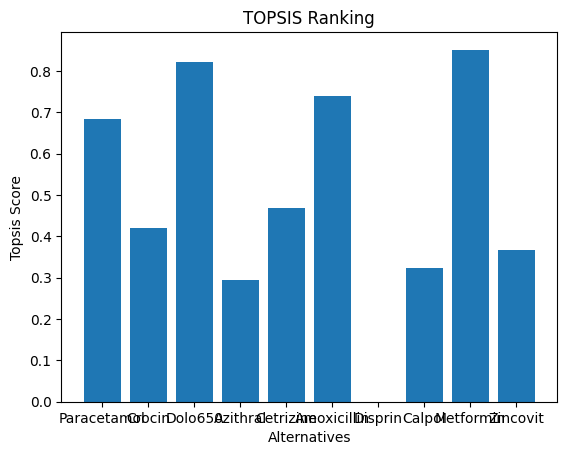

In [37]:
import matplotlib.pyplot as plt

plt.bar(mydata['Med_Name'], mydata['Topsis Score'])
plt.xlabel("Alternatives")
plt.ylabel("Topsis Score")
plt.title("TOPSIS Ranking")
plt.show()

## Command Line Usage

```bash
python topsis.py data.csv "1,1,1,1" "+,+,-,+" output.csv
